In [91]:
# Dieu
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_profiling import ProfileReport
from pprint import pprint
#Sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import os


## 4. Résoudre le cas d’étude présenté ci-dessus avec la librairie Scikit-Learn (exploration des données, préparation des données, modélisation, le test et l’interprétation des résultats).

In [92]:
df = pd.read_csv('../data/cardio_train.csv', sep=';', index_col=0)
df['age'] = np.floor(df['age'] / 365.25)
Y = df['cardio'].replace({0:1,1:2})
X = df.loc[:, df.columns != 'cardio']

In [93]:
# prof = ProfileReport(df)
# prof.to_file(output_file='rapport.html')

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=2019)

In [95]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [96]:
X = [[52*365]]
rf = RandomForestClassifier(n_estimators=100, random_state=2019)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7084


## 3. Visualiser et analyser les données avec les librairies Matplotlib et Seaborn.

Feature ranking:
1 weight 0.2303979585338472
2 height 0.20979880529193815
3 ap_hi 0.178425445300847
4 age 0.1644412969684453
5 ap_lo 0.10080038012188473
6 cholesterol 0.04363380593511041
7 gender 0.01951036458838933
8 gluc 0.019347898756538855
9 active 0.014744303249843037
10 smoke 0.010184449178382961
11 alco 0.008715292074773123


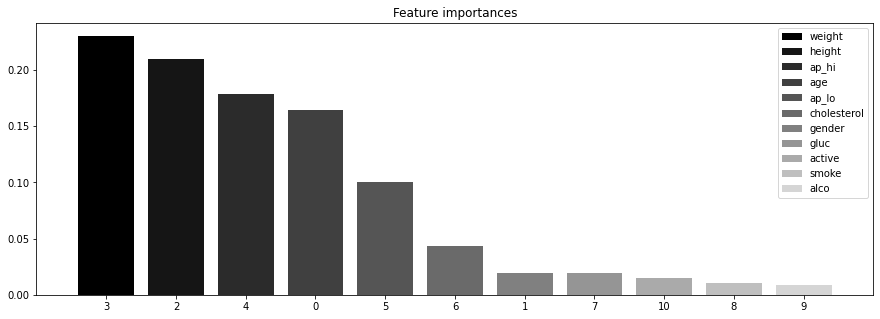

In [97]:
features = dict(zip(range(len(df.columns)-1), df.columns[:-1]))

# Важность признаков
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = max(10, len(df.columns[:-1]))
feature_indices = [ind for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in feature_indices]);

In [98]:
matrice_corr = df.corr(method='spearman').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'))
matrice_corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.0,-0.0205,-0.0834,0.063,0.22,0.158,0.142,0.0919,-0.0472,-0.0298,-0.0101,0.235
gender,-0.0205,1.0,0.534,0.172,0.0632,0.0664,-0.0357,-0.0189,0.338,0.171,0.00587,0.00811
height,-0.0834,0.534,1.0,0.314,0.0194,0.0305,-0.0589,-0.0244,0.198,0.0967,-0.00737,-0.0124
weight,0.063,0.172,0.314,1.0,0.278,0.254,0.138,0.11,0.0717,0.0681,-0.0149,0.183
ap_hi,0.22,0.0632,0.0194,0.278,1.0,0.735,0.209,0.105,0.0289,0.0332,-0.00127,0.452
ap_lo,0.158,0.0664,0.0305,0.254,0.735,1.0,0.167,0.0825,0.0262,0.0389,0.0034,0.363
cholesterol,0.142,-0.0357,-0.0589,0.138,0.209,0.167,1.0,0.408,0.0152,0.0413,0.00757,0.215
gluc,0.0919,-0.0189,-0.0244,0.11,0.105,0.0825,0.408,1.0,0.000468,0.0186,-0.00861,0.0915
smoke,-0.0472,0.338,0.198,0.0717,0.0289,0.0262,0.0152,0.000468,1.0,0.34,0.0259,-0.0155
alco,-0.0298,0.171,0.0967,0.0681,0.0332,0.0389,0.0413,0.0186,0.34,1.0,0.0255,-0.00733


## 5. Prédire Arthur
53 ans, fumeur, sportif, 175 cm, 85 kg, avec un taux de cholestérol au dessus de la normal et un taux de glucose normal, une tension artérielle systolique dans la moyenne et une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données, est un sujet à risques cardio-vasculaires.

In [99]:
pr_hi= df.ap_hi.mean()
pr_lo = df.ap_lo.quantile(q=[0.5,0.75]).mean()

arthur = [[53*365,2,175,85,pr_hi,pr_lo,2,1,1,0,1]]
arthur_alco = [[53*365,2,175,85,pr_hi,pr_lo,2,1,1,1,1]]

rf.predict(arthur)
pred_arthur = rf.predict_proba(arthur)
pred_arthur_alco = rf.predict_proba(arthur_alco)
print('arthur :',pred_arthur,'arthur alco :',pred_arthur_alco)


arthur : [[0.36 0.64]] arthur alco : [[0.36 0.64]]


In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.71      0.71      8712
           2       0.71      0.71      0.71      8788

    accuracy                           0.71     17500
   macro avg       0.71      0.71      0.71     17500
weighted avg       0.71      0.71      0.71     17500



In [101]:
df = pd.read_csv('../data/cardio_train.csv', sep=';', index_col=0)
df['age'] = np.floor(df['age'] / 365.25)
df1 = df.copy()
Y = df1['cardio'].replace({0:1,1:2})
X = df1.loc[:, df1.columns != 'cardio']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=2019)

In [103]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 1. RANDOM GRID SEARCH
source : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [104]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}          
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [51]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 69.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

Use the random grid to search for best hyperparameters
First create the base model to tune
``` 
rf = RandomForestRegressor()
```
Random search of parameters, using 3 fold cross validation, 
search across 100 different combinations, and use all available cores
```
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the 
```
random search model
```
rf_random.fit(X_train, y_train)
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 69.4min finished
RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)
```

In [52]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [76]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy 

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 1.5115 degrees.
Accuracy = 24.42%.


In [77]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 1.5115 degrees.
Accuracy = 24.42%.


In [78]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 1.5048 degrees.
Accuracy = 24.76%.


In [79]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.36%.


## 2. Grid Search with Cross Validation
source : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))